<a href="https://colab.research.google.com/github/SkyRanger2010/DE2024_PY/blob/main/HomeWork_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [130]:

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import datetime as dt

url='https://drive.google.com/file/d/1hIjXaXgoyi3SmWuE37k0j4e538fw_v4u/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)
df.sample(5)  # Исходный датасет (5 случайных записей)


,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total
4369,4911,53,Female,No,Tablet,SKU1002,3,Completed,Credit Card,494.06,247.03,2,2024-06-26,Express,NaN,0.00
9517,9580,35,Female,No,Smartphone,SKU1001,5,Completed,Credit Card,41.50,20.75,2,2023-11-27,Overnight,NaN,0.00
11970,12683,50,Female,No,Tablet,TBL345,4,Cancelled,Bank Transfer,2359.23,786.41,3,2024-05-10,Same Day,"Accessory, Accessory, Impulse Item",167.39
16839,17160,61,Female,No,Laptop,LTP123,3,Completed,Bank Transfer,6068.88,674.32,9,2024-05-03,Same Day,"Extended Warranty, Impulse Item",57.07
4616,5128,57,Female,No,Tablet,SKU1002,3,Completed,Cash,1976.24,247.03,8,2024-06-08,Overnight,NaN,0.00


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Customer ID        20000 non-null  int64  
 1   Age                20000 non-null  int64  
 2   Gender             19999 non-null  object 
 3   Loyalty Member     20000 non-null  object 
 4   Product Type       20000 non-null  object 
 5   SKU                20000 non-null  object 
 6   Rating             20000 non-null  int64  
 7   Order Status       20000 non-null  object 
 8   Payment Method     20000 non-null  object 
 9   Total Price        20000 non-null  float64
 10  Unit Price         20000 non-null  float64
 11  Quantity           20000 non-null  int64  
 12  Purchase Date      20000 non-null  object 
 13  Shipping Type      20000 non-null  object 
 14  Add-ons Purchased  15132 non-null  object 
 15  Add-on Total       20000 non-null  float64
dtypes: float64(3), int64(4

In [144]:
get_preffered = lambda x: ', '.join(x.mode()) # функция агрегации - перечисляет в строке самые часто встречающиеся значения

# Группируем данные по Customer ID, не учитываем отмененные сделки.
summary_by_customer = df[df['Order Status']=='Completed'].groupby('Customer ID').agg(
    preferred_payment_method=('Payment Method', get_preffered),
    total_spent=('Total Price', 'sum'),
    total_addons_spent=('Add-on Total', 'sum')
).reset_index()

summary_by_customer.sample(5)  # Результат задачи 1 (5 случайных записей)

,Customer ID,preferred_payment_method,total_spent,total_addons_spent
2507,5702,Cash,1976.24,52.09
735,2353,"Cash, Paypal",11296.35,69.05
6121,13527,PayPal,361.18,98.23
3344,7357,"Credit Card, Paypal",8595.55,83.13
1380,3626,Debit Card,6412.52,45.76


In [145]:
summary_by_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9466 entries, 0 to 9465
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               9466 non-null   int64  
 1   preferred_payment_method  9466 non-null   object 
 2   total_spent               9466 non-null   float64
 3   total_addons_spent        9466 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 295.9+ KB


In [150]:
# Доход по каждому методу доставки
income_by_shipping = df.groupby('Shipping Type')['Total Price'].sum().reset_index()
income_by_shipping

,Shipping Type,Total Price
0,Expedited,12437526.21
1,Express,8685215.62
2,Overnight,8704828.17
3,Same Day,12432024.82
4,Standard,21343073.55


In [151]:
# Доход по каждому типу продукта
income_by_product = df.groupby('Product Type')['Total Price'].sum().reset_index()
income_by_product

,Product Type,Total Price
0,Headphones,4041400.24
1,Laptop,12296239.97
2,Smartphone,21516754.69
3,Smartwatch,14036273.06
4,Tablet,11712000.41


In [146]:
# Преобразуем Purchase Date в datetime
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])

# Добавляем столбцы для месяца и квартала
df['Month'] = df['Purchase Date'].dt.to_period('M')
df['Quarter'] = df['Purchase Date'].dt.to_period('Q')
df.sample(5)

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total,Month,Quarter
2646,3411,23,Female,No,Smartwatch,SKU1003,3,Completed,Credit Card,844.83,844.83,1,2024-05-19,Overnight,"Impulse Item,Accessory,Extended Warranty",90.73,2024-05,2024Q2
17326,17600,51,Male,No,Laptop,LTP123,4,Completed,Bank Transfer,6743.20,674.32,10,2024-04-24,Same Day,"Extended Warranty, Accessory",78.38,2024-04,2024Q2
15330,15770,51,Female,No,Smartwatch,SWT567,2,Cancelled,Credit Card,2297.50,459.50,5,2024-06-14,Expedited,Impulse Item,85.53,2024-06,2024Q2
2582,3354,52,Female,No,Smartwatch,SKU1003,3,Completed,Paypal,7603.47,844.83,9,2023-12-21,Express,"Accessory,Impulse Item",58.67,2023-12,2023Q4
19970,19971,56,Male,No,Laptop,LTP123,5,Completed,Credit Card,6743.20,674.32,10,2024-04-02,Same Day,"Accessory, Accessory",123.39,2024-04,2024Q2


In [147]:
# Доход по дополнительным услугам за каждый месяц
income_by_addons_monthly = df.groupby(['Month'])['Add-on Total'].sum().sort_index().reset_index()
income_by_addons_monthly.head()

,Month,Add-on Total
0,2023-09,8012.62
1,2023-10,37837.12
2,2023-11,34888.81
3,2023-12,33509.15
4,2024-01,136195.16


In [148]:
# Доход по дополнительным услугам за каждый квартал
income_by_addons_quarterly = df.groupby(['Quarter'])['Add-on Total'].sum().sort_index().reset_index()
income_by_addons_quarterly.head()

,Quarter,Add-on Total
0,2023Q3,8012.62
1,2023Q4,106235.08
2,2024Q1,381298.34
3,2024Q2,382681.69
4,2024Q3,366669.23


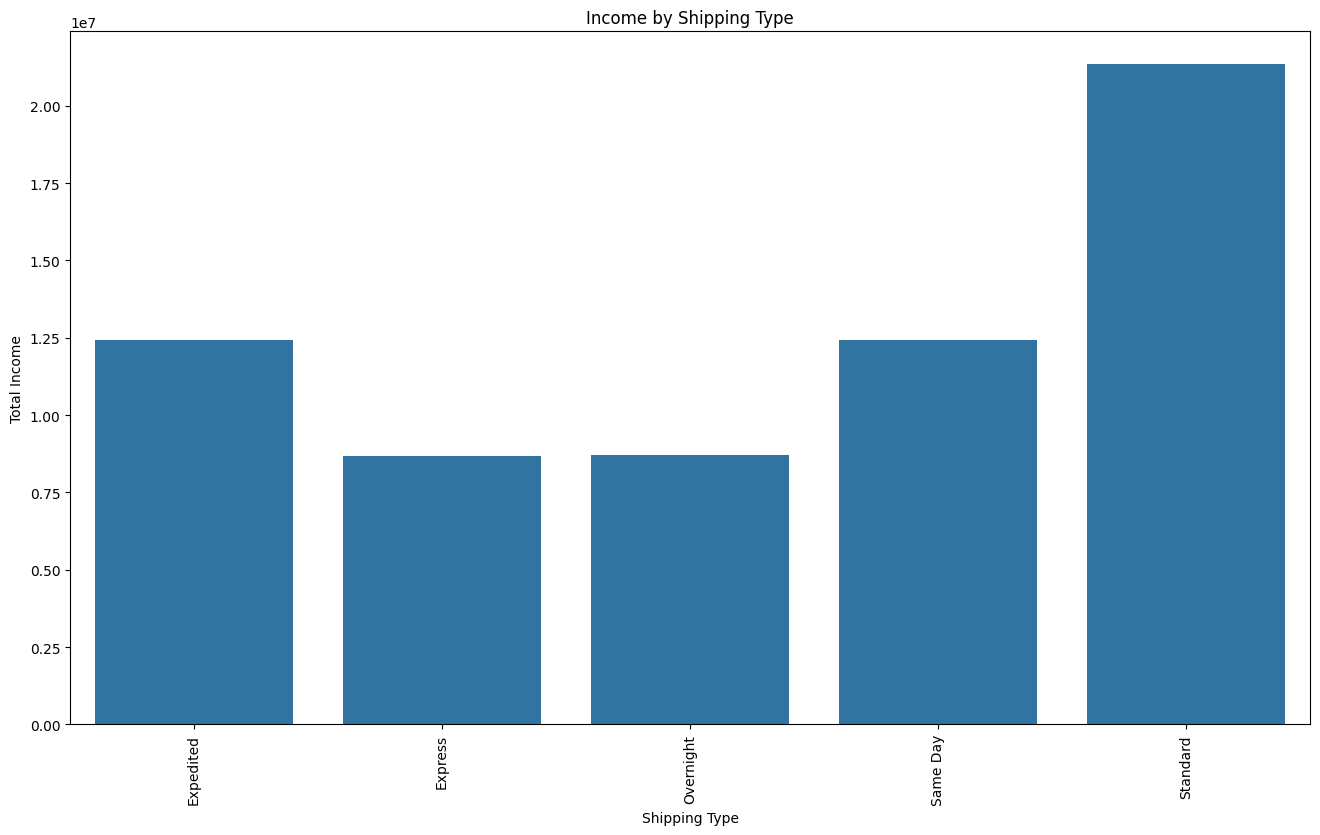

In [156]:

# Визуализация дохода по каждому методу доставки
plt.figure(figsize=(16, 9))
sns.barplot(x='Shipping Type', y='Total Price', data=income_by_shipping)
plt.title('Income by Shipping Type')
plt.ylabel('Total Income')
plt.xlabel('Shipping Type')
plt.xticks(rotation=90)
plt.show()

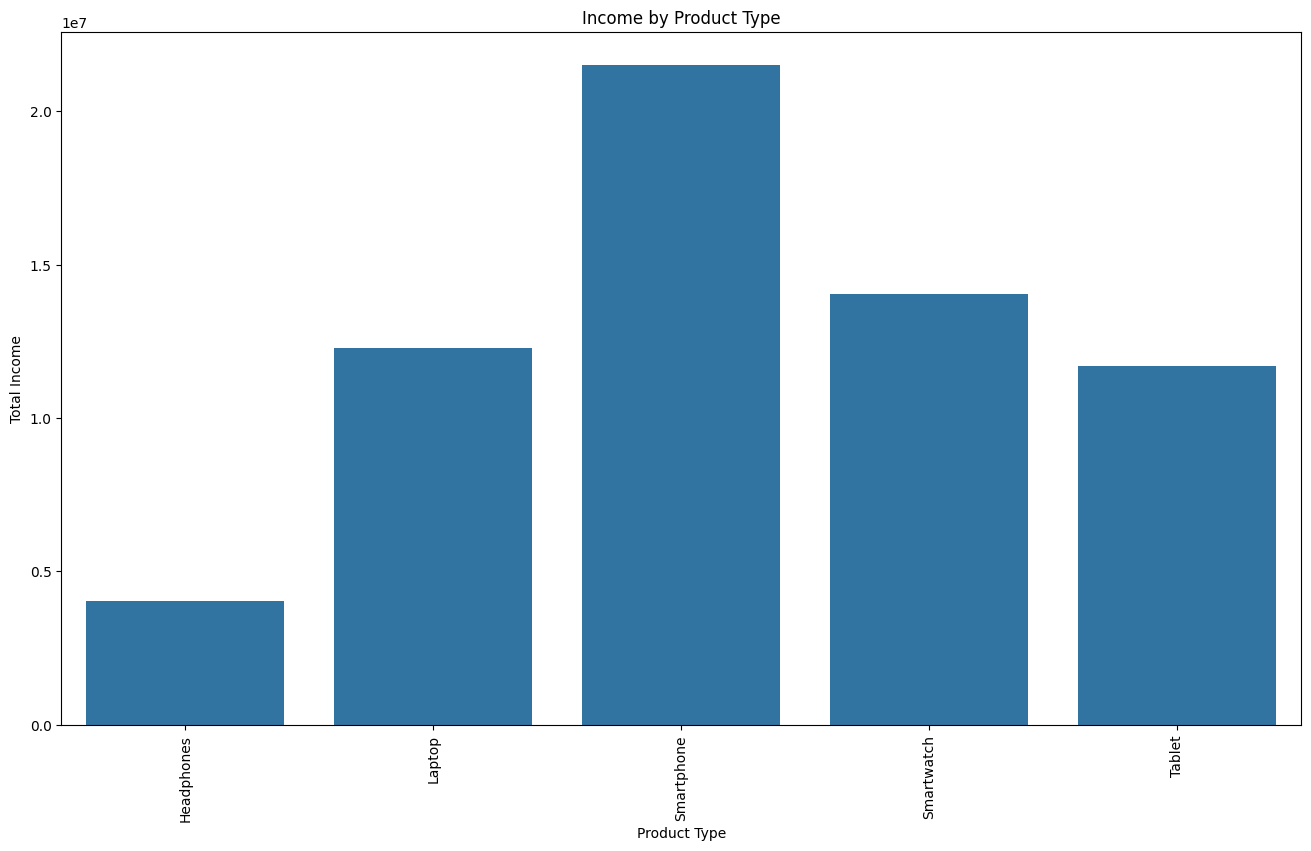

In [157]:
# Визуализация дохода по каждому типу продукта
plt.figure(figsize=(16, 9))
sns.barplot(x='Product Type', y='Total Price', data=income_by_product)
plt.title('Income by Product Type')
plt.ylabel('Total Income')
plt.xlabel('Product Type')
plt.xticks(rotation=90)
plt.show()

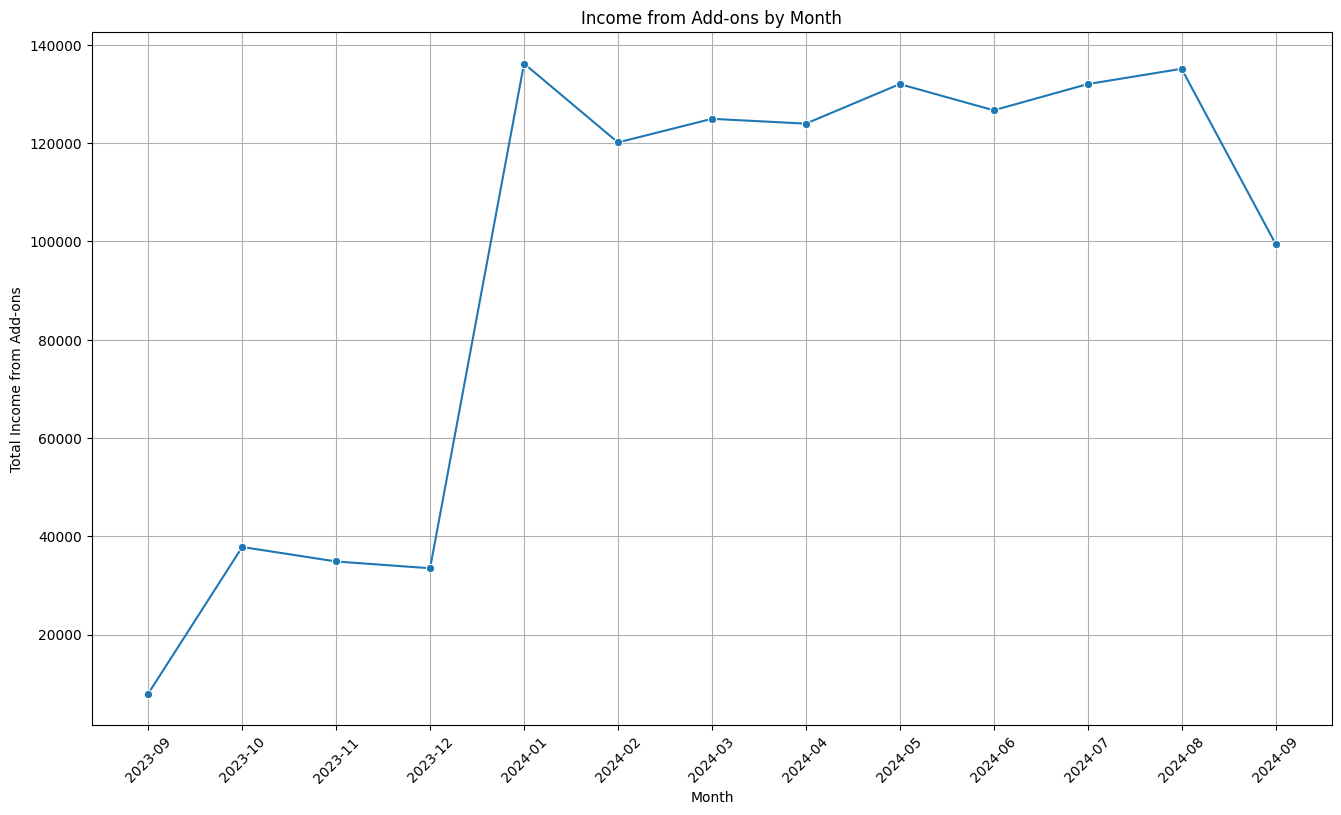

In [162]:
# Визуализация дохода по дополнительным услугам за месяц
income_by_addons_monthly['Month'] = income_by_addons_monthly['Month'].astype(str)
plt.figure(figsize=(16, 9))
sns.lineplot(x='Month', y='Add-on Total', marker='o', data=income_by_addons_monthly)
plt.title('Income from Add-ons by Month')
plt.ylabel('Total Income from Add-ons')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.grid()
plt.show()

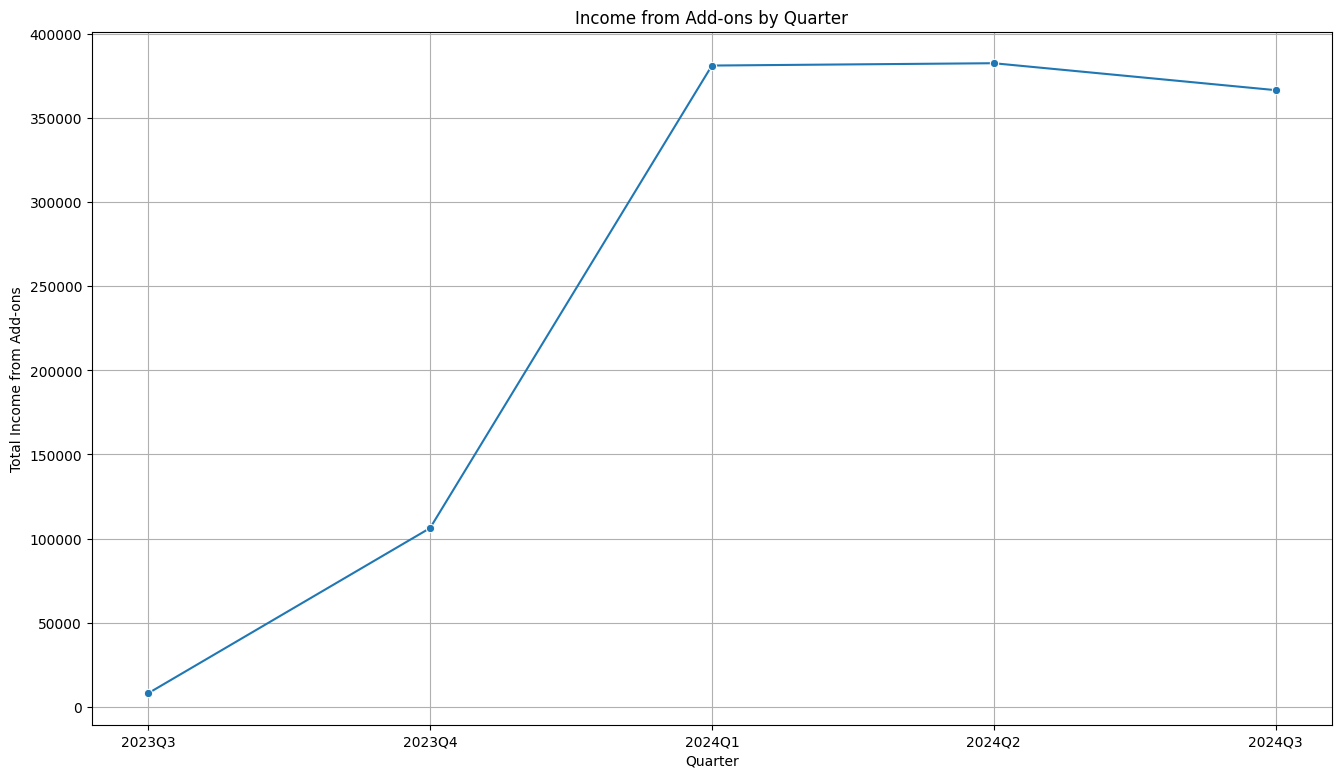

In [168]:
# Визуализация дохода по дополнительным услугам за квартал
income_by_addons_quarterly['Quarter'] = income_by_addons_quarterly['Quarter'].astype(str)
plt.figure(figsize=(16, 9))
sns.lineplot(x='Quarter', y='Add-on Total', marker='o', data=income_by_addons_quarterly)
plt.title('Income from Add-ons by Quarter')
plt.ylabel('Total Income from Add-ons')
plt.xlabel('Quarter')
plt.grid()
plt.show()